<a href="https://colab.research.google.com/github/mflagosv25/Talento-Tech/blob/main/Ejercicios%20y%20Tareas/Homework_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

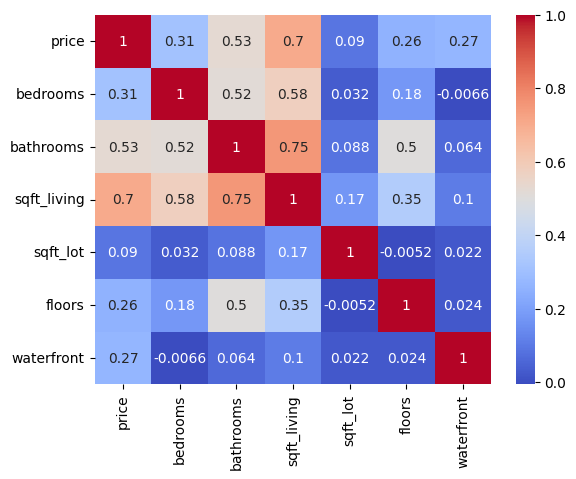

In [ ]:
#Carga y preparación de los datos
df = pd.read_csv('kc_house_data.csv') # Mostrar el data frame, hacer un análisis exploratorio de datos
df1 = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront']]
# Calculamos matriz de correlación
corr_matrix = df1.corr()
#Gráfica de la matriz de correlación
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

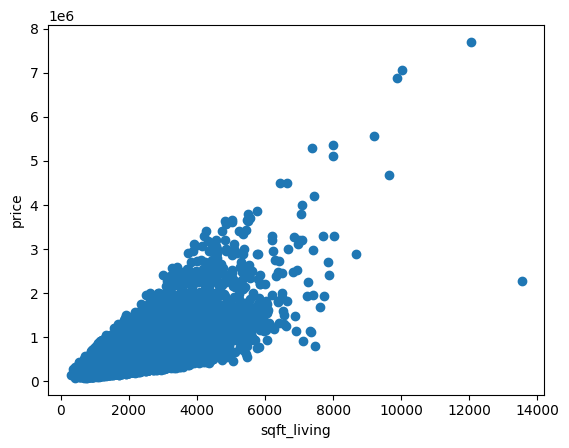

In [ ]:
plt.scatter(df1['sqft_living'], df1['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [ ]:
#Regresión Lineal Simple
df2 = df[['price','sqft_living']].copy()
X = df2[['sqft_living']]
y = df2['price']
# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(16209, 1)


In [ ]:
#Modelo de regresión lineal
modelo = LinearRegression(fit_intercept = True)
#Entrenamiento
modelo.fit(X_train,y_train)
print(f'Coeficientes: {modelo.coef_} \nIntersección: {modelo.intercept_}')

Coeficientes: [279.95863936] 
Intersección: -42958.73200078227


Text(0.5, 0, 'Area Construcción')

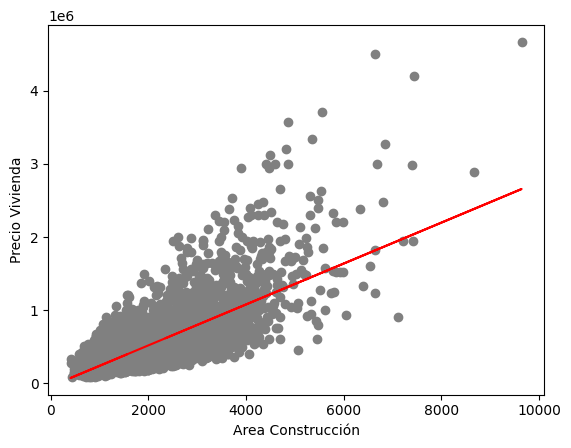

In [ ]:
#Predicciones
y_pred = modelo.predict(X_test)
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red')
plt.ylabel('Precio Vivienda')
plt.xlabel('Area Construcción')

Relacionando el Area con el precio

In [ ]:
# Evaluacnión mediante el MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#MSE
mse = mean_squared_error(y_test,y_pred)
print(f"Error cuadrático medio: {mse}")
print(f"Raiz del Error cuadrático medio: {np.sqrt(mse)}")
# Obtener el coheficiente de determinación, cercano a  [-1 , 1]
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación: {r2}")


Error cuadrático medio: 65492411972.816315
Raiz del Error cuadrático medio: 255914.85297421936
Coeficiente de determinación: 0.505502363628374


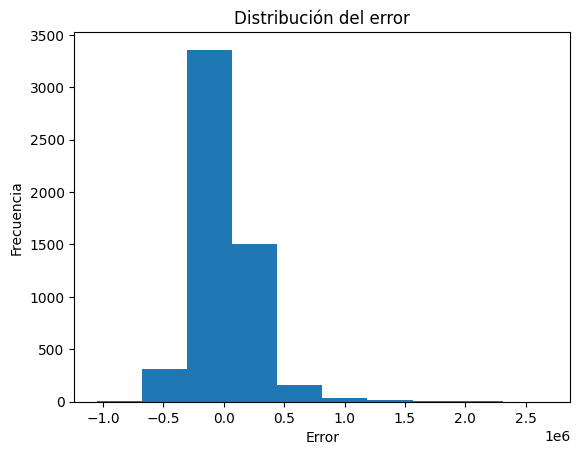

In [ ]:
# Hacer un diagrama de la distribución del error (Error = y_pred - y_test): Histograma (distribución gaussiana)
plt.hist(y_test - y_pred)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución del error")
plt.show()

In [ ]:
#Regresión lineal Múltiple
df3 = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront']].copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21613 non-null  float64
 6   waterfront   21613 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


In [ ]:
# Separación de los datos de entrenamiento y datos de prueba
X = df3[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront']]
y = df3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)

(17290, 6)


In [ ]:
#Modelo de regresión lineal
modelo = LinearRegression()
#Entrenamiento
modelo.fit(X_train,y_train)
print(f'Coeficientes: {modelo.coef_} \nIntersección: {modelo.intercept_}')

Coeficientes: [-5.14653344e+04  7.90639350e+03  3.02888267e+02 -3.78535524e-01
 -1.51853997e+03  7.55655498e+05] 
Intersección: 69745.19198710535


In [ ]:
# Evaluacnión mediante el MSE
from sklearn.metrics import mean_squared_error
#Prediciones
y_pred = modelo.predict(X_test)
#MSE
mse = mean_squared_error(y_test,y_pred)
print(f"Error cuadrático medio: {mse}")
print(f"Raiz del Error cuadrático medio: {np.sqrt(mse)}")
# Obtener el coheficiente de determinación, cercano a  [-1 , 1]
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación: {r2}")
# Hacerlo con dos variables para graficar en 3D

Error cuadrático medio: 62957396371.73758
Raiz del Error cuadrático medio: 250913.12514840186
Coeficiente de determinación: 0.5331440058437829


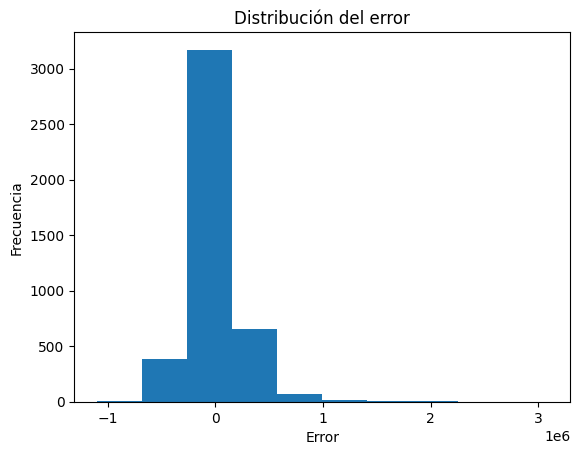

In [ ]:
# Hacer un diagrama de la distribución del error (Error = y_pred - y_test): Histograma (distribución gaussiana)
plt.hist(y_test - y_pred)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución del error")
plt.show()

## Procedimiento para dos variables

Relacionando el Area con  waterfront

In [ ]:
df4 = df[['price','sqft_living','waterfront']].copy()
# Separación de los datos de entrenamiento y datos de prueba
X = df4[['sqft_living','waterfront']]
y = df4['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Modelo de regresión lineal
modelo = LinearRegression()
#Entrenamiento
modelo.fit(X_train,y_train)
# Evaluacnión mediante el MSE
#Prediciones
y_pred = modelo.predict(X_test)
#MSE
mse = mean_squared_error(y_test,y_pred)
print(f"Error cuadrático medio: {mse}")
print(f"Raiz del Error cuadrático medio: {np.sqrt(mse)}")
# Obtener el coheficiente de determinación, cercano a  [-1 , 1]
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación: {r2}")

Error cuadrático medio: 60000417449.12202
Raiz del Error cuadrático medio: 244949.82639128776
Coeficiente de determinación: 0.5285768488066709


Relacionando el Área con el número de Baños de la propiedad

In [ ]:
df5 = df[['price','sqft_living','bedrooms']].copy()
# Separación de los datos de entrenamiento y datos de prueba
X = df5[['sqft_living','bedrooms']]
y = df5['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Modelo de regresión lineal
modelo = LinearRegression()
#Entrenamiento
modelo.fit(X_train,y_train)
# Evaluacnión mediante el MSE
#Prediciones
y_pred = modelo.predict(X_test)
#MSE
mse = mean_squared_error(y_test,y_pred)
print(f"Error cuadrático medio: {mse}")
print(f"Raiz del Error cuadrático medio: {np.sqrt(mse)}")
# Obtener el coheficiente de determinación, cercano a  [-1 , 1]
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación: {r2}")

Error cuadrático medio: 66946371809.74521
Raiz del Error cuadrático medio: 258739.9694862493
Coeficiente de determinación: 0.5191626377175984
